DS11 - Adélie Cleenewerck, Raphaël Crespo-Pereira, Mélanie Lobjois, Lauriane Robin

# Importation

In [68]:
import pandas as pd
sample_submission = pd.read_csv("/content/sample_submission.csv")
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

In [69]:
# Dimensions des sous-ensembles de test et de d'apprentissage
variable_dict = {'table de train': train, 'table de test' : test}
for i in ['table de train', 'table de test']:
    print('Les dimensions (lignes x colonnes) de la %s sont : ' %i, variable_dict[i].shape)

Les dimensions (lignes x colonnes) de la table de train sont :  (1460, 81)
Les dimensions (lignes x colonnes) de la table de test sont :  (1459, 80)


In [70]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [71]:
train.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [72]:
# vérifier qu'elles sont dans le bon type 
print("les variables numériques sont", train.select_dtypes(include=['float64','int64']).columns)
print("les variables catégorielles sont", train.select_dtypes(include=['object']).columns)

les variables numériques sont Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
les variables catégorielles sont Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'Bsm

## 1. Préparation des données

### Traitement des valeurs manquantes

In [73]:
# Valeurs manquantes
valeurs_manquantes=train.isna().sum().reset_index()
valeurs_manquantes.columns=(['Variables','Valeurs manquantes'])
valeurs_manquantes.reset_index(drop=True).sort_values(by='Valeurs manquantes',ascending=False).head(19)

,Variables,Valeurs manquantes
72,PoolQC,1453
74,MiscFeature,1406
6,Alley,1369
73,Fence,1179
57,FireplaceQu,690
3,LotFrontage,259
59,GarageYrBlt,81
64,GarageCond,81
58,GarageType,81
60,GarageFinish,81


In [74]:
train_na = (train.isnull().sum() / len(train)) * 100      
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Pourcentage de valeurs manquantes' :train_na})
missing_data.head(19)

,Pourcentage de valeurs manquantes
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


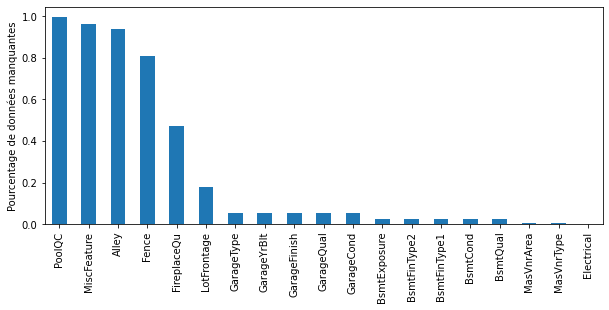

In [75]:
import matplotlib.pyplot as plt
vars_with_na = [var for var in train.columns if train[var].isnull().sum() > 0]
train[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Pourcentage de données manquantes')

plt.show()

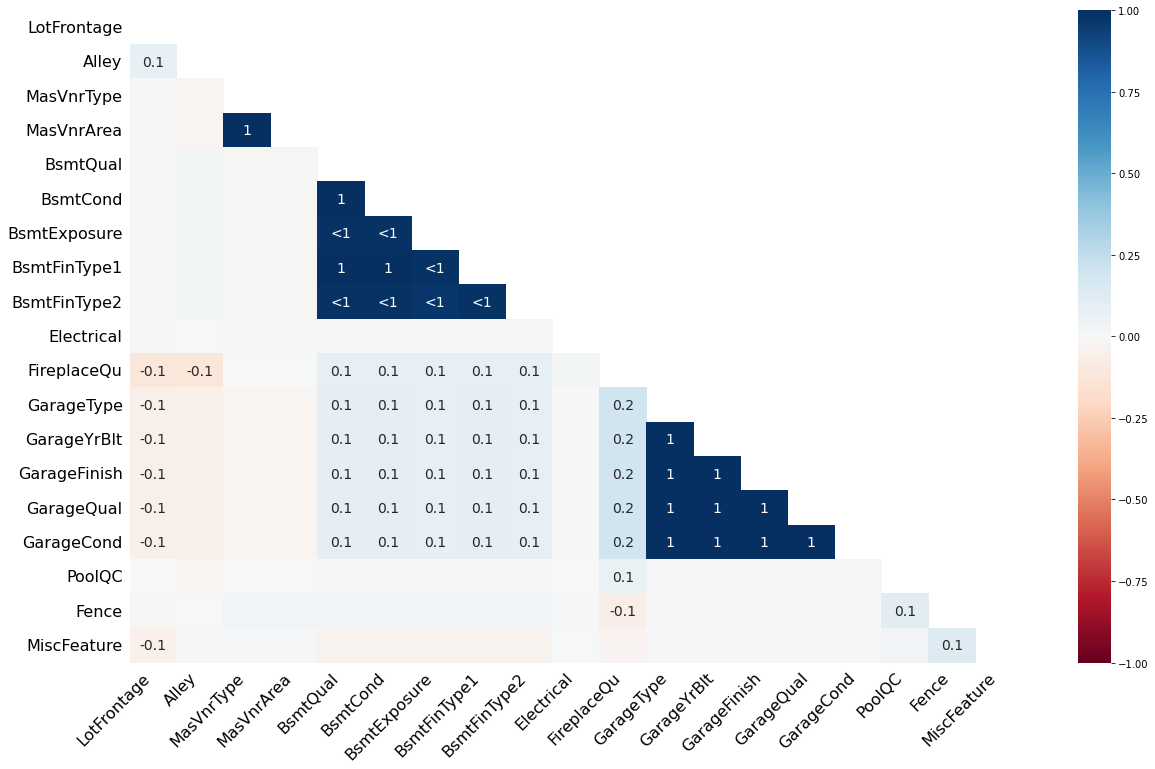

In [76]:
import missingno as msno
import matplotlib.pyplot as plt
msno.heatmap(train)
plt.show()

In [77]:
# Remplacer les valeurs manquantes

# Remplacer par "None"
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")
train["GarageYrBlt"] = train["GarageYrBlt"].fillna("None")
train["GarageCond"] = train["GarageCond"].fillna("None")
train["GarageType"] = train["GarageType"].fillna("None")
train["GarageFinish"] = train["GarageFinish"].fillna("None")
train["GarageQual"] = train["GarageQual"].fillna("None")
train["BsmtFinType2"] = train["BsmtFinType2"].fillna("None")
train["BsmtExposure"] = train["BsmtExposure"].fillna("None")
train["BsmtQual"] = train["BsmtQual"].fillna("None")
train["BsmtCond"] = train["BsmtCond"].fillna("None")
train["BsmtFinType1"] = train["BsmtFinType1"].fillna("None")
train["MasVnrType"] = train["MasVnrType"].fillna("None")

# Supprimer variables dont les modalités sont sur-représentées
train = train.drop(columns=['PoolQC'])
train = train.drop(columns=['MiscFeature'])
train = train.drop(columns=['Alley'])
train = train.drop(columns=['Fence'])

# Remplacer par la moyenne les variables numériques pouvant être remplacé
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))
train["MasVnrArea"] = train.groupby("Neighborhood")["MasVnrArea"].transform(lambda x: x.fillna(x.mean()))
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

### Outliers

Text(0.5, 1.0, 'Le prix des maisons en fonction de la surface')

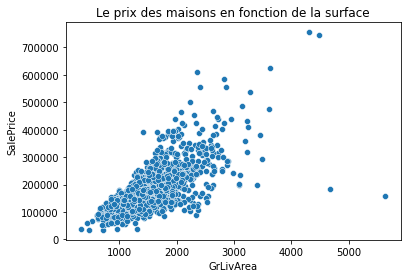

In [78]:
import seaborn as sns
s = sns.scatterplot(data=train,x='GrLivArea',y='SalePrice')
s.set_title("Le prix des maisons en fonction de la surface")

In [79]:
# supprimer observations "aberrantes" (maisons avec prix anormalement élevés)
train=train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

# 2. Statistiques descriptives

Moyenne du prix : 180933.0
Médiane du prix : 163000.0


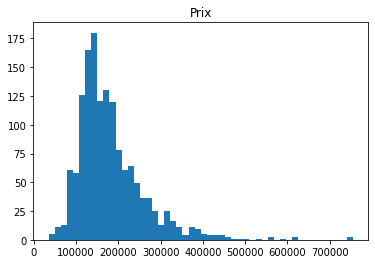

In [80]:
# Prix
import matplotlib.pyplot as plt
print("Moyenne du prix :", round(train["SalePrice"].mean(),0))
print("Médiane du prix :", train["SalePrice"].median())

train["SalePrice"].hist(bins=50, grid=False)
plt.title("Prix");

# 3. Sélection des variables

### Préparation de la data avant la sélection des variables : on recode les variables catégorielles en numérique ordonnée

In [81]:
train["GarageCond"] = train["GarageCond"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0})
train["GarageQual"] = train["GarageQual"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0})
train["GarageFinish"] = train["GarageFinish"].replace({"Fin": 3, "RFn": 2, "Unf": 1, "None": 0})
train["FireplaceQu"] = train["FireplaceQu"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0})
train["KitchenQual"] = train["KitchenQual"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1})
train["HeatingQC"] = train["HeatingQC"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1})
train["BsmtFinType1"] = train["BsmtFinType1"].replace({"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, "Unf": 1, "None": 0})
train["BsmtExposure"] = train["BsmtExposure"].replace({"Gd": 5, "Av": 4, "Mn": 3, "No": 2, "None": 1})
train["BsmtCond"] = train["BsmtCond"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0})
train["BsmtQual"] = train["BsmtQual"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0})
train["ExterCond"] = train["ExterCond"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1})
train["ExterQual"] = train["ExterQual"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1})
train["HeatingQC"] = train["HeatingQC"].replace({"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1})

train["Street"] = train["Street"].replace({"Grvl": 1, "Paved": 2})
train["LandContour"] = train["LandContour"].replace({"Lvl": 4, "Bnk": 3, "HLS" : 2, "Low": 1})
train["LotShape"] = train["LotShape"].replace({"IR3": 1,"IR2": 2, "IR1": 3, "Reg" : 4})
train["Utilities"] = train["Utilities"].replace({"ELO": 1,"NoSeWa": 2, "NoSewr": 3, "AllPub" : 4})
train["LandSlope"] = train["LandSlope"].replace({"Gtl": 1,"Mod": 2, "Sev": 3})
train["CentralAir"] = train["CentralAir"].replace({"N": 0, "Y": 1})
train["GarageFinish"] = train["GarageFinish"].replace({"None": 0,"Unf": 1, "RFn": 2, "Fin" : 3})

In [82]:
#création de dummies pour les catégorielles non ordonnées 
modalities = ['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM']

# Fonction pour créer une série de variables dummies
def create_dummies(row, modalities):
    dummies = pd.Series([0] * len(modalities))
    modality = row['MSZoning']
    if modality in modalities:
        dummies[modalities.index(modality)] = 1
    return dummies

# Création des variables dummies
dummies_df = train.apply(lambda x: create_dummies(x, modalities), axis=1)
dummies_df.columns = ["MS_zoning_" + modality for modality in modalities]
train = pd.concat([train, dummies_df], axis=1)

In [83]:
# vérifier qu'elles sont dans le bon type 
print("les variables numériques sont", train.select_dtypes(include=['float64','int64']).columns)
print("les variables catégorielles sont", train.select_dtypes(include=['object']).columns)

les variables numériques sont Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MS_zoning_A',
       'MS_zoning_C', 'MS_zoning_FV', 'MS_zoning_I', 'MS_zoning_RH',
       'MS_zoning_RL', 'MS_zoning_RP', 'MS_zoning_RM'],
      dtype='

In [84]:
train = train.drop(columns=['MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtFinType2', 'Heating', 'Electrical', 'Functional', 'GarageType',
       'GarageYrBlt', 'PavedDrive', 'SaleType', 'SaleCondition', 'MS_zoning_A', 'MS_zoning_C', 'MS_zoning_I', 'MS_zoning_RP'])

### Variables corrélées avec la variable cible : avec méthode 1, statistiques univariées

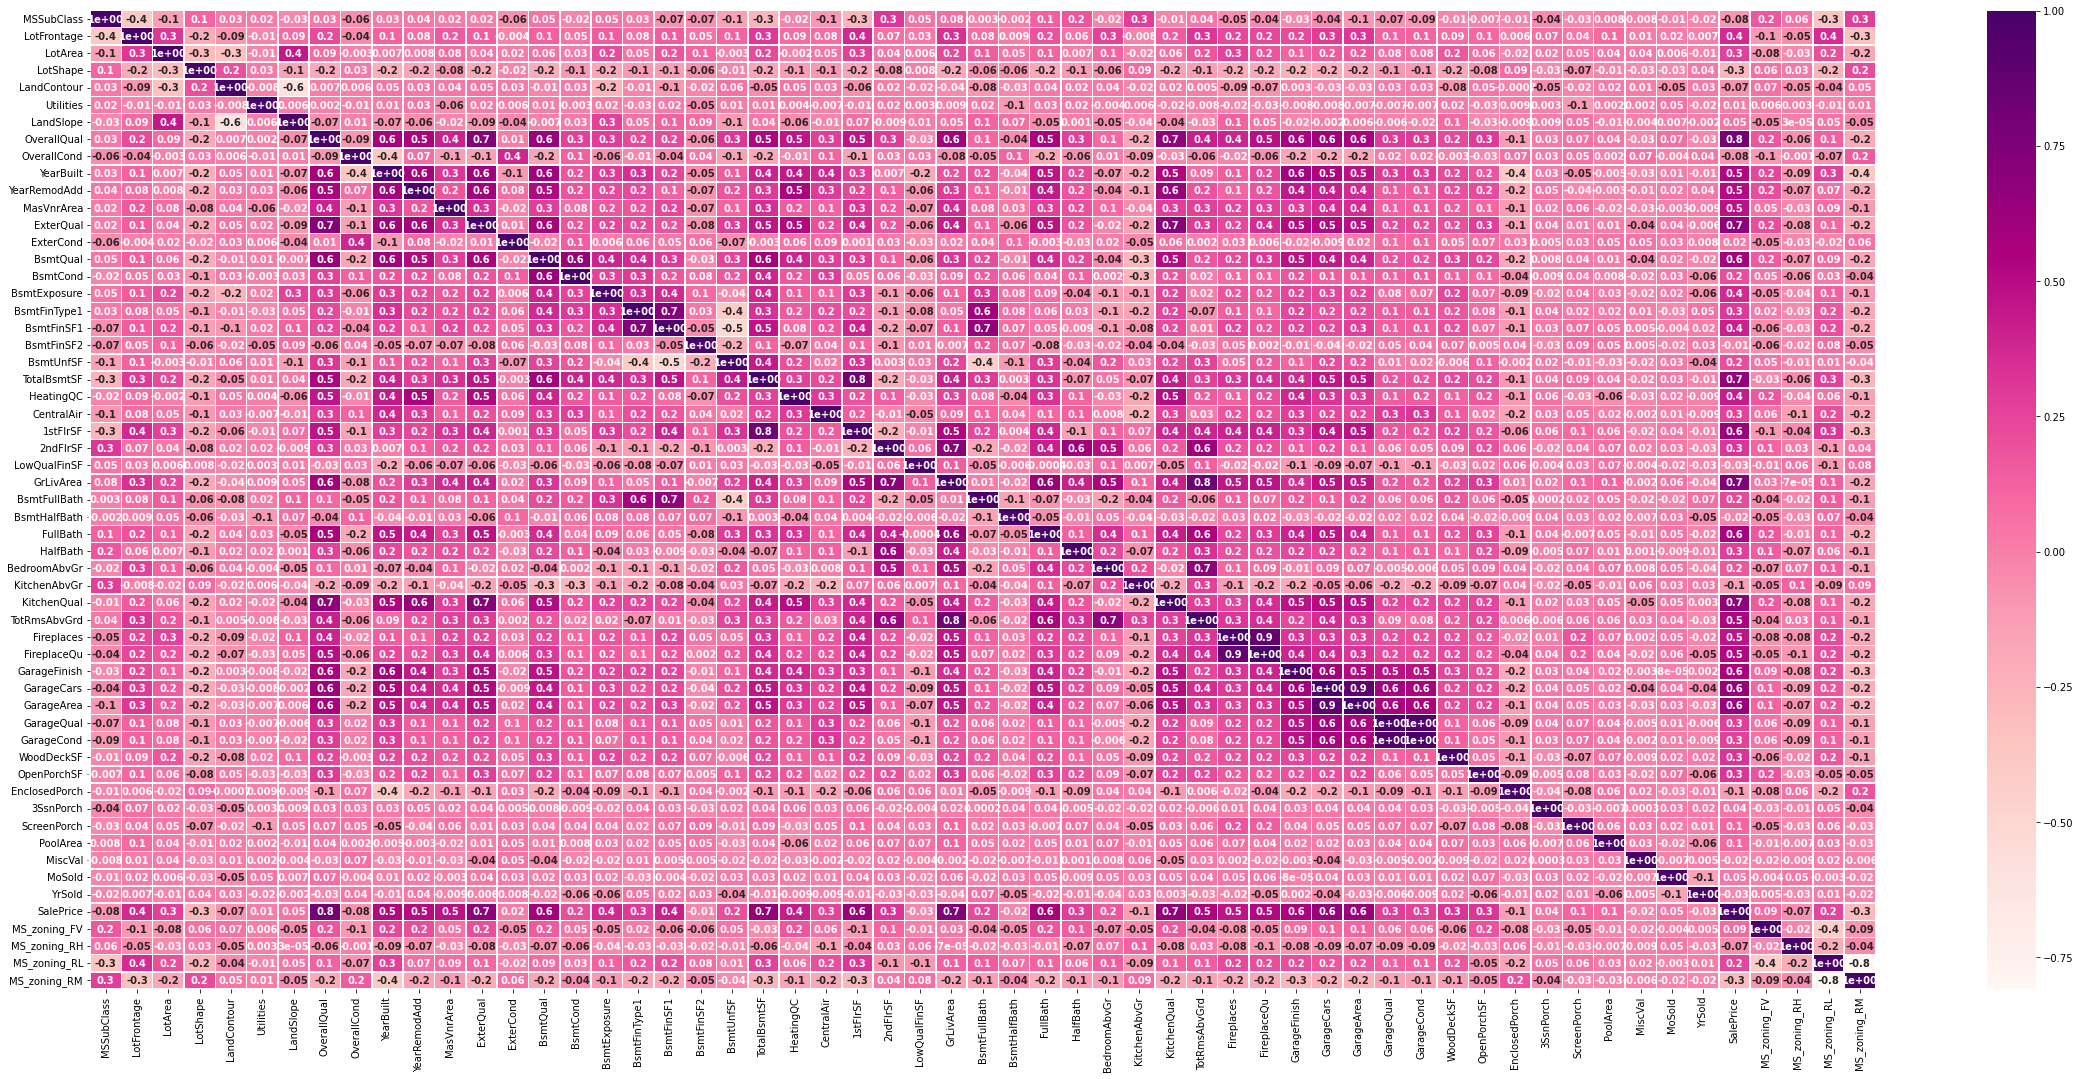

In [85]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.ticker as ticker

train_matrix = train.drop(columns=['Id'])

corr = train_matrix.corr()
fig1 = plot.figure(figsize=(40, 18))
sns.heatmap(train_matrix.corr(), annot=True, annot_kws={'weight':'bold'},fmt=".1", linewidths=.5, cmap='RdPu')

In [86]:
nocorr_features = list(corr[corr['SalePrice']>0.2].index)
nocorr_features

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'MS_zoning_RL']

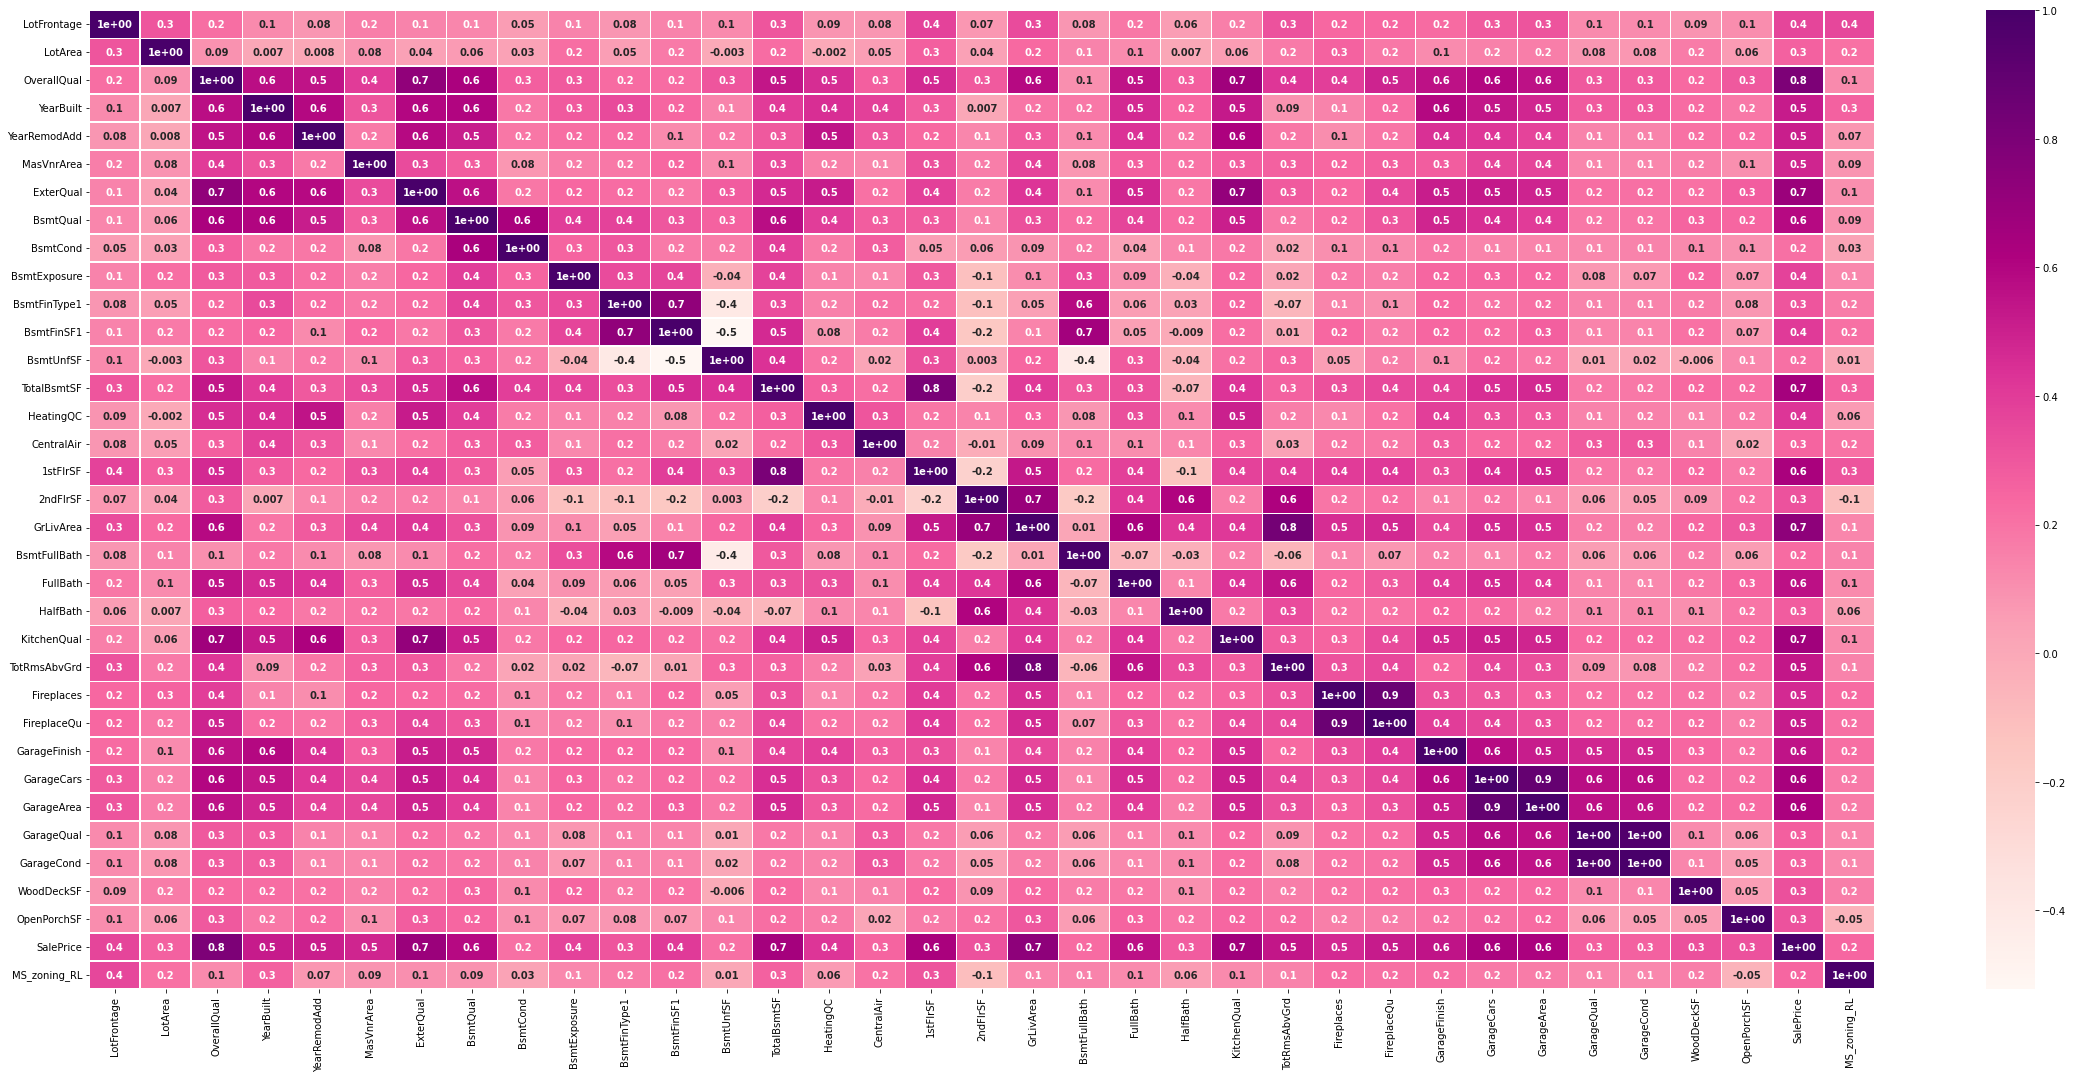

In [87]:
# matrice de corrélation avec les variables dont la corrélation > 0.2 avec la cible
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.ticker as ticker

train_matrix = train[['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'MS_zoning_RL']]

corr = train_matrix.corr()
fig1 = plot.figure(figsize=(40, 18))
sns.heatmap(train_matrix.corr(), annot=True, annot_kws={'weight':'bold'},fmt=".1", linewidths=.5, cmap='RdPu')

### Variables corrélées avec la variable cible : avec méthode 2, basée sur un modèle

confirme le tri précédent avec la matrice de corrélation
& permet de préciser dans l'ordre les variables les plus importantes 

In [96]:
# Modèle de Forêt Aléatoire pour sélectionner les variables selon la valeur d'importance
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor

# Target
y_train = train['SalePrice']

# Data
train_randomForest = train.drop(columns=['Id', 'SalePrice'])

# Modèle
# random_state pour garder le même modèle à chaque relance du code
rf_cat = RandomForestRegressor(n_estimators=100, criterion='mse', max_features='sqrt', random_state=12)
rf_cat.fit(train_randomForest, y_train)

RandomForestRegressor(criterion='mse', max_features='sqrt', random_state=12)

Text(0.5, 1.0, 'Variables catégorielles triées selon leur valeur dimportance de la variable')

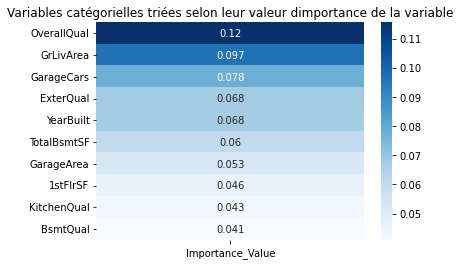

In [97]:
# Graphique des valeurs d'importance - Top 10 des valeurs expliquant le plus la variable cible 
# confirme le tri précédent avec la matrice de corrélation
# permet de préciser dans l'ordre les variables les plus importantes 

rf_cat_feature_importance_df = pd.DataFrame(rf_cat.feature_importances_, train_randomForest.columns, columns=['Importance_Value'])
rf_cat_top10_features = rf_cat_feature_importance_df.sort_values(by = ['Importance_Value'], ascending=False).head(10)

sns.heatmap(data = rf_cat_top10_features, annot=True, cmap="Blues")
plt.title('Variables catégorielles triées selon leur valeur d''importance de la variable')

### Variables corrélées avec la variable cible : avec méthode 3,  basée sur l'élimination des caractéristiques récursives (ECR ou RFE en anglais)

https://www.kaggle.com/code/arthurtok/feature-ranking-rfe-random-forest-linear-models 

In [134]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import numpy as np

# Target
y_train = train['SalePrice']

# Data
train_randomForest_RFE = train.drop(columns=['Id', 'SalePrice'])

# Définir un dictionnaire pour stocker nos classements
ranks = {}
# Créer notre fonction qui stocke les classements des fonctionnalités dans le dictionnaire des classements
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

colnames = train_randomForest_RFE.columns

In [141]:
# Enlever les warnings
import warnings
warnings.filterwarnings('ignore')

# Construction du modèle RandomForest
# random_state pour garder le même modèle à chaque relance du code
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import numpy as np

rf = RandomForestRegressor(n_estimators=100, criterion='mse', max_features='sqrt', random_state = 28)
rf.fit(train_randomForest_RFE, y_train)

# Arrêter l'algorithme lorsqu'il ne reste que la dernière variable
# verbose : faire apparaître ce que l'algorithme fait, 3 pour affichage type slow
rfe = RFE(rf, n_features_to_select=1, verbose = 8)
rfe.fit(train_randomForest_RFE,y_train)

ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 fe

Text(0.5, 1.0, 'Variables catégorielles triées selon leur valeur dimportance de la variable avec RFE')

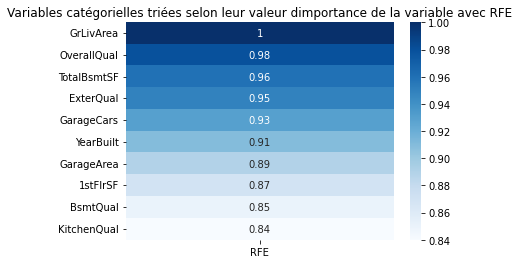

In [142]:
rfe_data = pd.DataFrame(ranks)
rfe_data = rfe_data[["RFE"]]
rfe_top10_features = rfe_data.sort_values(by = ['RFE'], ascending=False).head(10)
sns.heatmap(data = rfe_top10_features, annot=True, cmap="Blues")
plt.title('Variables catégorielles triées selon leur valeur d''importance de la variable avec RFE')

### Variables corrélées entre elles

In [ ]:
def find_correlated_features(df, threshold=0.3):
    correlated_features = {}
    correlation_matrix = df.corr().abs()
    for column in correlation_matrix.columns:
        correlated_features[column] = list(correlation_matrix.index[correlation_matrix[column] > threshold])
    return correlated_features

correlated_features = find_correlated_features(train_matrix)
for feature, correlated_list in correlated_features.items():
    print(f"{feature} is correlated with: {correlated_list}")

LotFrontage is correlated with: ['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice', 'MS_zoning_RL']
LotArea is correlated with: ['LotFrontage', 'LotArea']
OverallQual is correlated with: ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'SalePrice']
YearBuilt is correlated with: ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'FullBath', 'KitchenQual', 'GarageFinish', 'GarageCars', 'GarageArea', 'SalePrice']
YearRemodAdd is correlated with: ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'HeatingQC', 'FullBath', 'KitchenQual', 'GarageFinish', 'GarageCars', 'GarageArea', 'SalePrice']
MasVnrArea is correl